In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
events = pd.read_csv(r"C:\Users\HP\Desktop\Datasets\MINI PROJECT DATASETS\events.csv")
info = pd.read_csv(r"C:\Users\HP\Desktop\Datasets\MINI PROJECT DATASETS\ginf.csv")

In [3]:
events

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,...,NaN,NaN,8.0,2.0,0,9.0,1.0,1,3.0,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,...,NaN,NaN,NaN,NaN,0,4.0,NaN,0,NaN,0


In [4]:
info

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86


In [31]:
#correlation matrix of events dataset
corr = events.corr()

corr.style.background_gradient(cmap='coolwarm')

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,year
sort_order,1.000000,0.947250,0.026910,0.002374,0.008273,-0.001873,-0.010904,0.001942,-0.001870,-0.000192,-0.017561,0.007689,0.011868,-0.028041
time,0.947250,1.000000,0.020504,-0.008898,0.005235,-0.002687,-0.009503,0.004524,0.011627,-0.004724,-0.009880,-0.004081,0.010997,0.011140
event_type,0.026910,0.020504,1.000000,0.872814,0.030552,0.002827,nan,-0.181353,-0.717710,-0.007678,-0.447777,0.005075,-0.077738,-0.011651
event_type2,0.002374,-0.008898,0.872814,1.000000,0.028143,-0.004296,-0.024400,-0.070693,0.116820,-0.057724,-0.628870,-0.022952,-0.069514,-0.022114
side,0.008273,0.005235,0.030552,0.028143,1.000000,0.002161,0.002105,-0.018046,-0.027981,-0.016465,-0.030710,-0.011913,-0.001515,0.001253
shot_place,-0.001873,-0.002687,0.002827,-0.004296,0.002161,1.000000,-0.306615,-0.029265,-0.041362,0.116835,0.062178,0.209643,0.051322,-0.002836
shot_outcome,-0.010904,-0.009503,nan,-0.024400,0.002105,-0.306615,1.000000,-0.396532,0.102751,-0.064234,-0.103168,-0.025466,-0.036209,0.012016
is_goal,0.001942,0.004524,-0.181353,-0.070693,-0.018046,-0.029265,-0.396532,1.000000,0.109981,-0.000840,0.231330,0.088813,0.146052,0.004405
location,-0.001870,0.011627,-0.717710,0.116820,-0.027981,-0.041362,0.102751,0.109981,1.000000,-0.373770,0.265875,-0.021526,0.052957,-0.004209
bodypart,-0.000192,-0.004724,-0.007678,-0.057724,-0.016465,0.116835,-0.064234,-0.000840,-0.373770,1.000000,0.279845,0.182869,-0.036467,0.006061


In [32]:
#correlation matrix of info dataset
corr = info.corr()

corr.style.background_gradient(cmap='coolwarm')

,adv_stats,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
adv_stats,1.000000,0.329867,-0.002170,-0.013743,0.011216,0.005219,0.006103,nan,nan,nan,nan
season,0.329867,1.000000,-0.011237,0.001784,0.049611,0.031705,0.005069,nan,nan,nan,nan
fthg,-0.002170,-0.011237,1.000000,-0.059805,-0.240801,0.288969,0.361478,-0.244443,0.251837,0.017735,0.001079
ftag,-0.013743,0.001784,-0.059805,1.000000,0.299424,-0.050605,-0.199595,-0.099825,0.034237,-0.164960,0.149443
odd_h,0.011216,0.049611,-0.240801,0.299424,1.000000,0.071255,-0.358183,-0.112535,0.076239,-0.001412,-0.002349
odd_d,0.005219,0.031705,0.288969,-0.050605,0.071255,1.000000,0.869377,-0.643428,0.890038,0.269658,-0.199582
odd_a,0.006103,0.005069,0.361478,-0.199595,-0.358183,0.869377,1.000000,-0.457703,0.698667,0.394644,-0.309923
odd_over,nan,nan,-0.244443,-0.099825,-0.112535,-0.643428,-0.457703,1.000000,-0.831154,0.402242,-0.444216
odd_under,nan,nan,0.251837,0.034237,0.076239,0.890038,0.698667,-0.831154,1.000000,-0.143452,0.214141
odd_bts,nan,nan,0.017735,-0.164960,-0.001412,0.269658,0.394644,0.402242,-0.143452,1.000000,-0.910499


In [5]:
# concating useful information from info to events

events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941009 entries, 0 to 941008
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [7]:
extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
events['year'] = [extract_year(x) for key, x in enumerate(events['date'])]

In [8]:
#creating a new dataset named shots

shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

C:\Users\HP\AppData\Local\Temp/ipykernel_2796/2882235095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
C:\Users\HP\AppData\Local\Temp/ipykernel_2796/2882235095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
C:\Users\HP\AppData\Local\Temp/ipykernel_2796/2882235095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [9]:
shots

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,2.0,0,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,2.0,0,15.0,1.0,1,1.0,0,Germany,2011-08-05,2011
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,1.0,1,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,z5L2OT5E/,z5L2OT5E102,102,81,Attempt blocked. Remo Freuler (Atalanta) right...,1,NaN,1,Atalanta,Sampdoria,...,3.0,0,15.0,1.0,0,1.0,0,Italy,2017-01-22,2017
940991,z5L2OT5E/,z5L2OT5E110,110,84,Attempt missed. Alberto Grassi (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,2.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017
940992,z5L2OT5E/,z5L2OT5E111,111,86,Attempt saved. Alejandro Gomez (Atalanta) righ...,1,12.0,1,Atalanta,Sampdoria,...,1.0,0,9.0,1.0,1,1.0,0,Italy,2017-01-22,2017
940993,z5L2OT5E/,z5L2OT5E112,112,87,Attempt saved. Fabio Quagliarella (Sampdoria) ...,1,12.0,2,Sampdoria,Atalanta,...,1.0,0,15.0,1.0,1,1.0,0,Italy,2017-01-22,2017


In [34]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229135 entries, 0 to 941006
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        229135 non-null  object 
 1   id_event       229135 non-null  object 
 2   sort_order     229135 non-null  int64  
 3   time           229135 non-null  int64  
 4   text           229135 non-null  object 
 5   event_type     229135 non-null  int64  
 6   event_type2    168560 non-null  float64
 7   side           229135 non-null  int64  
 8   event_team     229135 non-null  object 
 9   opponent       229135 non-null  object 
 10  player         229122 non-null  object 
 11  player2        167798 non-null  object 
 12  player_in      0 non-null       object 
 13  player_out     0 non-null       object 
 14  shot_place     227452 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        229135 non-null  int64  
 17  location       229135 non-nul

In [35]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [36]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

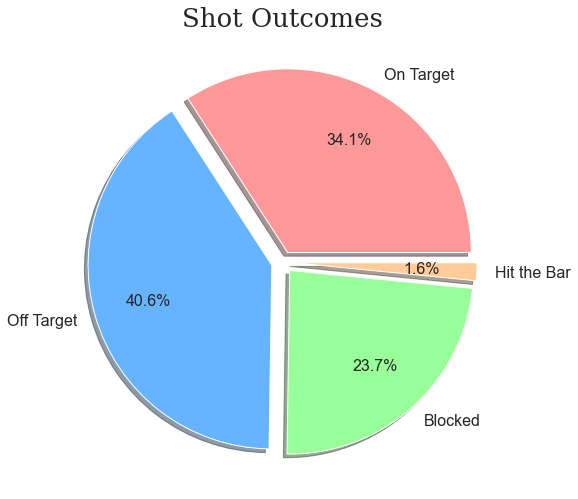

In [37]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [24]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'A Bit high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Missed to the left', \
                                        9: 'Missed to the right', 10: 'very high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

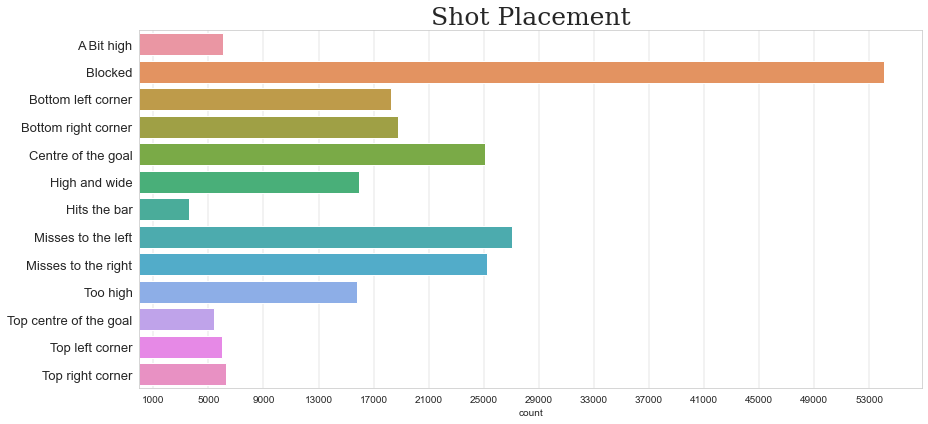

In [23]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()


In [15]:
data = pd.get_dummies(shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = shots['is_goal']


In [17]:
data

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,...,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick,is_goal
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
940991,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
940992,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
940993,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [39]:
#splitting the dataset into trainset and testset
X=data.drop(labels='is_goal',axis=1)
y=data['is_goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

### DEPLOYING MACHINE LEARNING MODELS

### GRADIENT BOOSTING CLASSIFIER

In [40]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [41]:
model_pred = model.predict(X_test)

print(accuracy_score(y_test,model_pred))

0.9109952866655029


In [42]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [43]:
#Confusion matrix
print(confusion_matrix(y_test,model.predict(X_test)))

[[70790   904]
 [ 6234  2270]]


In [44]:
#Classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



### LOGISTIC REGRESSION

In [45]:
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [21]:
model_pred = model.predict(X_test)

print(accuracy_score(y_test,model_pred))

0.9109828175266216


In [46]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [23]:
#confusion matrix
print(confusion_matrix(y_test,model.predict(X_test)))

[[70820   874]
 [ 6265  2239]]


In [24]:
#classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



### DECISION TREE CLASSIFIER

In [29]:

model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model_pred = model.predict(X_test)

print(accuracy_score(y_test,model_pred))

0.9108331878600464


In [30]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [31]:
#confusion matrix
print(confusion_matrix(y_test,model.predict(X_test)))

[[70763   931]
 [ 6220  2284]]


In [32]:
#classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.81      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



### WHICH PLAYERS ARE THE BEST FINISHERS

In [54]:
shots['prediction'] = model.predict_proba(X)[:, 1]
shots['difference'] = shots['prediction'] - shots['is_goal']

C:\Users\HP\AppData\Local\Temp/ipykernel_2796/3778964094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['prediction'] = model.predict_proba(X)[:, 1]
C:\Users\HP\AppData\Local\Temp/ipykernel_2796/3778964094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['difference'] = shots['prediction'] - shots['is_goal']


In [55]:
players = shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players.expectedGoals = round(players.expectedGoals,2)
players.difference = round(players.difference,2)
players['ratio'] = players['trueGoals'] / players['expectedGoals']

In [57]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].head(10)


In [58]:
show

,rank,player,difference,trueGoals,expectedGoals
0,1,Lionel Messi,-58.49,205,146.51
1,2,Zlatan Ibrahimovic,-33.00,153,120.00
2,3,Gonzalo Higuain,-32.38,118,85.62
3,4,Luis Suarez,-31.76,96,64.24
4,5,Cristiano Ronaldo,-30.62,198,167.38
5,6,Robert Lewandowski,-25.89,124,98.11
6,7,Alexandre Lacazette,-25.88,88,62.12
7,8,Alexis Sanchez,-22.87,80,57.13
8,9,Diego Costa,-21.16,93,71.84
9,10,Karim Benzema,-20.81,85,64.19
